In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# My Tools
%matplotlib inline

In [2]:
# Reseting figure size params.
plt.rcParams['figure.figsize'] = [12, 7]

In [3]:
# Setting seaborn as default plotting lib.
sns.set()

In [4]:
# Reading data.
df = pd.read_csv('encuesta_baches.csv')

## Showing df.

In [5]:
df.head()

,Marca temporal,Lugar de residencia.,Si selecciono PARAGUAY como lugar de residencia. Puede indicar el departamento en el que vive actualmente.,Como calificaría el estado de las calles en su lugar de residencia.,Considera que exista un problema de baches en su lugar de residencia.,Puede hacer una estimación de la cantidad de baches en su lugar de residencia.,Tipo de camino en su lugar de residencia.,Cuanto tiempo cree que demora la reparación de baches en su lugar de residencia.,Conoce algún método para denunciar la existencia de baches en su lugar de residencia.,"Puede acceder a información sobre los baches de su lugar de residencia. (Denuncias, ubicación y tareas de reparación de baches.)",Usted sufrió accidentes a causa de baches en su lugar de residencia.,Si tiene vehículo. Cuan frecuentemente debe hacer mantenimiento a causa del estado de las calles o baches de su lugar de residencia.,Denunciaría la existencia de baches en su lugar de residencia.,Cree que seria util conocer la ubicación y otros datos de los baches en su lugar de residencia.,Si considera que su lugar de residencia tiene un problema de baches. Como califica la repuesta gubernamental al problema.,Puede estimar la regularidad con la que se reparan las calles en su lugar de residencia actual.
0,29/10/2022 21:02:13,Venezuela,NaN,Malo,SI,MUCHOS,ASFALTO,MUCHO,NO,NO,SI,REGULARMENTE,SI,SI,LAMENTABLE,NUNCA
1,30/10/2022 9:28:12,Argentina,NaN,Bueno,SI,POCOS,ASFALTO,MUCHO,SI,NO,NO,FRECUENTEMENTE,SI,SI,LAMENTABLE,REGULARMENTE
2,30/10/2022 10:05:24,Mexico,NaN,Lamentable,SI,MUCHOS,ASFALTO,MUCHO,SI,SI,SI,REGULARMENTE,SI NO ME LLEVA MUCHO TIEMPO.,SI,LAMENTABLE,REGULARMENTE
3,30/10/2022 10:12:40,Spain,NaN,Bueno,SI,POCOS,ASFALTO,MUCHO,SI,NO,NO,REGULARMENTE,SI,SI,BUENA,REGULARMENTE
4,30/10/2022 10:21:56,Singapore,Central,Exelente,NO,NaN,ASFALTO,POCO,SI,SI,NO NUNCA,FRECUENTEMENTE,SI,NO,EXELENTE,REGULARMENTE


In [6]:
# Showing columns.
for i in df.columns: print(i)

Marca temporal
Lugar de residencia.
Si selecciono PARAGUAY como lugar de residencia. Puede indicar el departamento en el que vive actualmente.
Como calificaría el estado de las calles en su lugar de residencia.
Considera que exista un problema de baches en su lugar de residencia.
Puede hacer una estimación de la cantidad de baches en su lugar de residencia.
Tipo de camino en su lugar de residencia.
Cuanto tiempo cree que demora la reparación de baches en su lugar de residencia.
Conoce algún método para denunciar la existencia de baches en su lugar de residencia.
Puede acceder a información sobre los baches de su lugar de residencia. (Denuncias, ubicación y tareas de reparación de baches.)
Usted sufrió accidentes a causa de baches en su lugar de residencia.
Si tiene vehículo. Cuan frecuentemente debe hacer mantenimiento a causa del estado de las calles o baches de su lugar de residencia.
Denunciaría la existencia de baches en su lugar de residencia.
Cree que seria util conocer la ubicac

## Saving questions to a new file.

In [7]:
with open("preguntas.txt", "a") as file:
    for k,v in enumerate(df.columns): 
        file.write(f"{k}) {v} \n \n \n")
    file.close()
    

## Renaming columns

In [8]:
new_names = {
'Marca temporal':'marca_temporal',
'Lugar de residencia.':'lugar_residencia',
'Si selecciono PARAGUAY como lugar de residencia. Puede indicar el departamento en el que vive actualmente.':'lugar_residencia_py',
'Como calificaría el estado de las calles en su lugar de residencia.':'estado_calles',
'Considera que exista un problema de baches en su lugar de residencia.':'problema_baches',
'Puede hacer una estimación de la cantidad de baches en su lugar de residencia.':'estimacion_cantidad',
'Tipo de camino en su lugar de residencia.':'tipo_camino',
'Cuanto tiempo cree que demora la reparación de baches en su lugar de residencia.':'tiempo_reparaciones',
'Conoce algún método para denunciar la existencia de baches en su lugar de residencia.':'como_denunciar',
'Puede acceder a información sobre los baches de su lugar de residencia. (Denuncias, ubicación y tareas de reparación de baches.)':'acceso_informacion',
'Usted sufrió accidentes a causa de baches en su lugar de residencia.':'sufrio_accidentes',
'Si tiene vehículo. Cuan frecuentemente debe hacer mantenimiento a causa del estado de las calles o baches de su lugar de residencia.':'frecuencia_mantenimiento',
'Denunciaría la existencia de baches en su lugar de residencia.':'denunciaria_baches',
'Cree que seria util conocer la ubicación y otros datos de los baches en su lugar de residencia.':'util_conocer',
'Si considera que su lugar de residencia tiene un problema de baches. Como califica la repuesta gubernamental al problema.':'respuesta_gubernamental',
'Puede estimar la regularidad con la que se reparan las calles en su lugar de residencia actual.':'regularidad_reparaciones',
}

In [9]:
df.rename(columns=new_names, inplace=True)

In [12]:
for i in df.columns: 
    print(i)
    print('=============')

marca_temporal
lugar_residencia
lugar_residencia_py
estado_calles
problema_baches
estimacion_cantidad
tipo_camino
tiempo_reparaciones
como_denunciar
acceso_informacion
sufrio_accidentes
frecuencia_mantenimiento
denunciaria_baches
util_conocer
respuesta_gubernamental
regularidad_reparaciones


# General Inspection

In [21]:
df.shape

(439, 16)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   marca_temporal            439 non-null    object
 1   lugar_residencia          439 non-null    object
 2   lugar_residencia_py       247 non-null    object
 3   estado_calles             436 non-null    object
 4   problema_baches           437 non-null    object
 5   estimacion_cantidad       435 non-null    object
 6   tipo_camino               438 non-null    object
 7   tiempo_reparaciones       437 non-null    object
 8   como_denunciar            436 non-null    object
 9   acceso_informacion        438 non-null    object
 10  sufrio_accidentes         438 non-null    object
 11  frecuencia_mantenimiento  386 non-null    object
 12  denunciaria_baches        435 non-null    object
 13  util_conocer              436 non-null    object
 14  respuesta_gubernamental   

 - Tenemos 439 respuestas a la encuesta.

## Contamos valores null por columna.

In [23]:
for i in df.columns:
    print(f'Columna: {i} -> {df[i].isna().sum()}')
    

Columna: marca_temporal -> 0
Columna: lugar_residencia -> 0
Columna: lugar_residencia_py -> 192
Columna: estado_calles -> 3
Columna: problema_baches -> 2
Columna: estimacion_cantidad -> 4
Columna: tipo_camino -> 1
Columna: tiempo_reparaciones -> 2
Columna: como_denunciar -> 3
Columna: acceso_informacion -> 1
Columna: sufrio_accidentes -> 1
Columna: frecuencia_mantenimiento -> 53
Columna: denunciaria_baches -> 4
Columna: util_conocer -> 3
Columna: respuesta_gubernamental -> 10
Columna: regularidad_reparaciones -> 5


        En el lugar de residencia en paraguay se presenta la mayor cantidad de valores "null" esto se debe a que la encuesta la respondieron personas de todas partes del mundo.

# Lugar de Residencia 

In [24]:
df['lugar_residencia'].value_counts()

Paraguay                       236
Mexico                          47
Argentina                       34
Spain                           21
Dominican Republic              19
Peru                            15
Venezuela                       13
Colombia                        12
Bolivia                         12
Chile                            5
Panama                           2
Honduras                         2
Uruguay                          2
Anguilla                         2
Guatemala                        2
Italy                            1
Cuba                             1
Papua New Guinea                 1
United States                    1
Philippines                      1
Andorra                          1
El Salvador                      1
Antarctica                       1
Singapore                        1
France                           1
Brazil                           1
Puerto Rico                      1
Ecuador                          1
Ashmore and Cartier 

<AxesSubplot:title={'center':'Conteo general por lugar de residencia.\n Total Respuestas : 439'}>

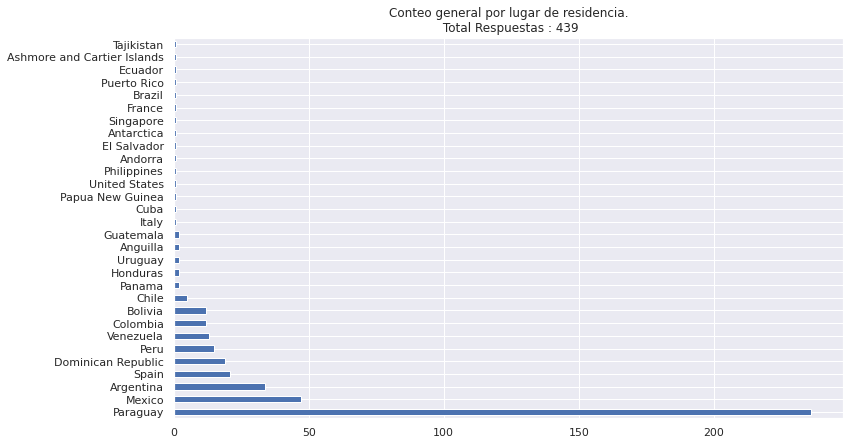

In [29]:
df['lugar_residencia'].value_counts().plot(
    kind ='barh',
    title=f"Conteo general por lugar de residencia.\n Total Respuestas : {df['lugar_residencia'].size}",
)

In [31]:
lr = df['lugar_residencia'].value_counts()

## Trabajamos con los paises que tienen mas de 2 respuestas.

In [36]:
paises = lr[lr > 1]

<AxesSubplot:title={'center':'Paises con mas de 2 respuestas.'}>

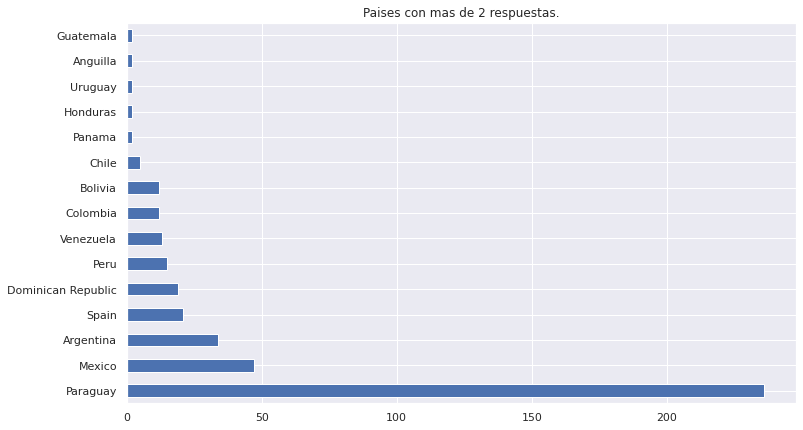

In [38]:
paises.plot(
    kind='barh',
    title='Paises con mas de 2 respuestas.')

Puede verse que Argentina, Mexico y Paraguay son los paises donde mas se contesto la encuesta.